# 220968280 - Anirudh Swaminathan - DSE A2

## Week 4 - Exercise 1 - KNN algorithm on breast_cancer.csv using sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Dataset
### 2. Rename columns

In [2]:
df = pd.read_csv('datasets//breast_cancer.csv')
df.replace('?',np.nan,inplace=True)
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class']
df = df.dropna(axis=0)

### 3. Drop redundant columns

In [3]:
df = df.drop('Id', axis=1)
df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


### 4. View the summary of the dataset

In [4]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.441349,3.153959,3.218475,2.832845,3.236070,3.445748,2.872434,1.604106,2.700880
std,2.822751,3.066285,2.989568,2.865805,2.224214,2.451435,3.054065,1.733792,0.954916
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 6. Convert the data type of Bare_Nuclei to an integer

In [5]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int')

### 7. Check data types of columns of data frame

In [6]:
df.dtypes

Clump_thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

### 9. Check the distribution of variables using histograms

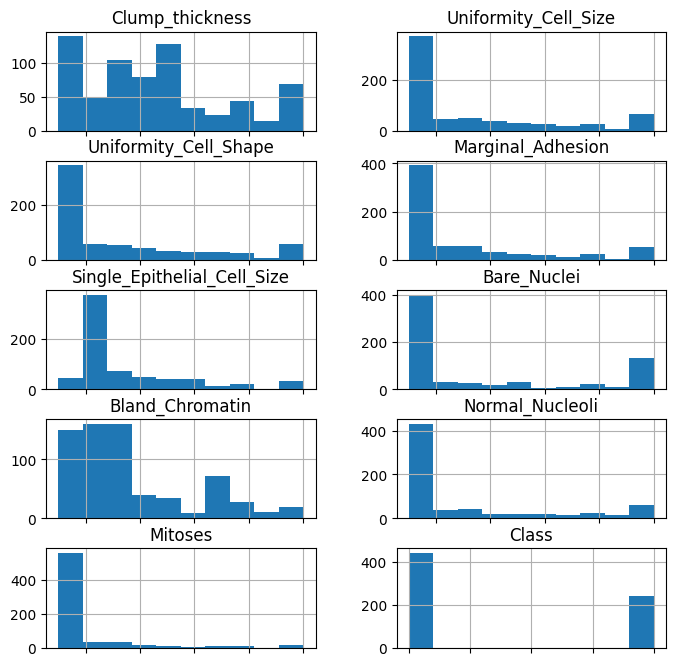

In [7]:
fig, axis = plt.subplots(5,2,figsize=(8, 8))
df.hist(ax=axis)
for ax in fig.axes:
    ax.set_xticklabels([])

plt.show()

### 10. Estimate correlation coefficients and represent using heatmaps

<Axes: >

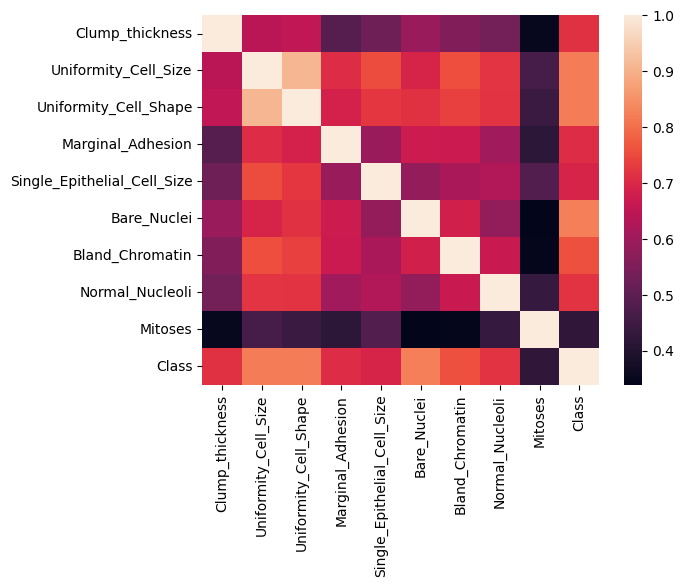

In [8]:
sns.heatmap(df.corr())

### 11. Declare feature vector and target variable

In [9]:
X = df.drop('Class', axis=1)
Y = df['Class']

### 12. Split data into separate training and test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 13. Perform Feature Scaling(Normalize)

In [11]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [12]:
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

### 14. Fit the K Neighbours Classifier to the training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 15. Predict test-set results 
### 16. Check the accuracy score 
### 17. Compare the train-set and test-set accuracy

In [15]:
y_pred = knn.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy of train set:", accuracy)

Accuracy of train set: 0.9577981651376147


In [16]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of test set:", accuracy)

Accuracy of test set: 0.9124087591240876


### 20. Display confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82  5]
 [ 7 43]]


### 21. Generate classification report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.92      0.94      0.93        87
           4       0.90      0.86      0.88        50

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137



### 22. Evaluate classification error

In [19]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
error = (FP+FN)/(TP+FP+FN+TN)
print(f'classification error: {error[0]}')

classification error: 0.08759124087591241


### 23. Generate ROC curve and ROC AUC score.

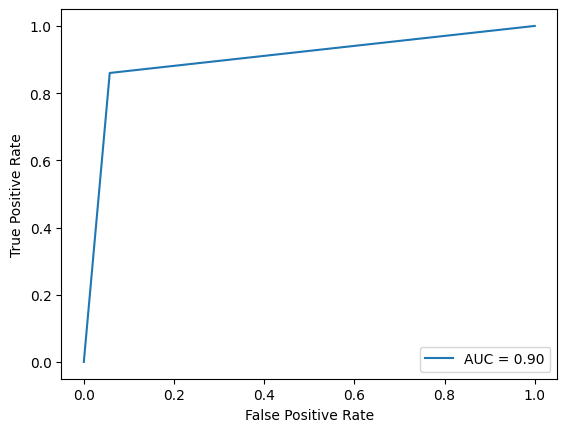

In [20]:
from sklearn import metrics
label = {2:0, 4:1}
fpr, tpr, thresholds = metrics.roc_curve(pd.Series(y_test).map(label), pd.Series(y_pred).map(label))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

### 24. Perform k-fold validation

In [21]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
svc = svm.SVC(gamma='scale')
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
kfold = KFold(n_splits=10)
scores = cross_val_score(svc, x, y, cv=kfold)
for i in range(len(scores)):
    print(f"Fold {i+1}: {scores[i]}")
print(f"Average accuracy: {scores.mean()}")

Fold 1: 0.9710144927536232
Fold 2: 0.927536231884058
Fold 3: 0.9117647058823529
Fold 4: 0.8676470588235294
Fold 5: 0.9411764705882353
Fold 6: 0.9558823529411765
Fold 7: 0.8382352941176471
Fold 8: 0.8970588235294118
Fold 9: 0.8676470588235294
Fold 10: 0.9264705882352942
Average accuracy: 0.9104433077578857


### 18. Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)
### 19. Tabulate the results using the Tabulate package

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
k_values = range(3, 10)
splits = [0.3, 0.25, 0.2]

results = pd.DataFrame(columns=['k', 'Train-Test Split', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        precision = precision_score(pd.Series(y_test).map(label), pd.Series(y_pred).map(label))
        recall = recall_score(pd.Series(y_test).map(label), pd.Series(y_pred).map(label))
        f1 = f1_score(pd.Series(y_test).map(label), pd.Series(y_pred).map(label))
        accuracy = accuracy_score(pd.Series(y_test).map(label), pd.Series(y_pred).map(label))
        iteration_results = pd.DataFrame({'k': [k], 'Train-Test Split': [split], 'Precision': [precision], 'Recall': [recall], 'F1-score': [f1], 'Accuracy': [accuracy]})
        results = pd.concat([results, iteration_results], ignore_index=True)
results = results.sort_values(by='k')
print(tabulate(results, headers='keys', tablefmt='psql', showindex=False))

C:\Users\s_ani\AppData\Local\Temp\ipykernel_13488\675301730.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, iteration_results], ignore_index=True)


+-----+--------------------+-------------+----------+------------+------------+
|   k |   Train-Test Split |   Precision |   Recall |   F1-score |   Accuracy |
|-----+--------------------+-------------+----------+------------+------------|
|   3 |               0.3  |    0.96875  | 0.898551 |   0.932331 |   0.956098 |
|   3 |               0.2  |    0.958333 | 0.92     |   0.938776 |   0.956204 |
|   3 |               0.25 |    0.964286 | 0.915254 |   0.93913  |   0.959064 |
|   4 |               0.3  |    0.96875  | 0.898551 |   0.932331 |   0.956098 |
|   4 |               0.2  |    0.957447 | 0.9      |   0.927835 |   0.948905 |
|   4 |               0.25 |    0.963636 | 0.898305 |   0.929825 |   0.953216 |
|   5 |               0.3  |    0.96875  | 0.898551 |   0.932331 |   0.956098 |
|   5 |               0.2  |    0.957447 | 0.9      |   0.927835 |   0.948905 |
|   5 |               0.25 |    0.963636 | 0.898305 |   0.929825 |   0.953216 |
|   6 |               0.2  |    0.957447